<a href="https://colab.research.google.com/github/Auta01/Pytorch/blob/main/convolutional%20neural%20network_with%20_pytorch_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
### importing computer vision libaries
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor


import matplotlib.pyplot as plt
!pip install torchvision

In [24]:
##Getting a dataset
#setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data =datasets.FashionMNIST(
    root = 'data',
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [25]:
#Create a convolutional neuralnetwork

import torch
from torch import nn
class FashionModel(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels =input_shape,
                  out_channels= hidden_units,
                  kernel_size =3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, # Corrected: input_shape should be hidden_units after the first Conv2d
                     out_channels = hidden_units,
                     kernel_size =3,
                     stride=1,
                     padding =1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels =hidden_units,
                 out_channels =hidden_units,
                  kernel_size =3,
                  stride=1,
                  padding=1), # Corrected: padidng to padding
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                 kernel_size=3,
                  stride =1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2) # Corrected: MaxpPool2d to MaxPool2d
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units, # This in_features needs to be calculated based on the output of conv_block_2
                  out_features=output_shape)
    )


  def forward(self, x):
        x=self.block_1(x) # Corrected: conv_block_1 to block_1
        print(x.shape)
        x= self.conv_block_2(x) # Corrected: con_block_2 to conv_block_2
        print(x.shape)
        x =self.classifier(x)

        return x


In [26]:
class_names =train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [27]:
torch.manual_seed(42)
model_2= FashionModel(input_shape=1,
                        hidden_units =10,
                        output_shape=len(class_names))

In [62]:
## stepping through nn.con2d
images = torch.rand(size=(32,3, 44, 44))
test_images.unsqueeze(0)

print(f'Images batch shape:{images.shape}') # Corrected images_shape to images.shape
print(f'single image shape:{test_images.shape}')
print(f'test image:{test_images}') # Corrected f-string syntax

Images batch shape:torch.Size([32, 3, 44, 44])
single image shape:torch.Size([3, 44, 44])
test image:tensor([[[0.1562, 0.9035, 0.0430,  ..., 0.6958, 0.5525, 0.7714],
         [0.1810, 0.7548, 0.7382,  ..., 0.4359, 0.6675, 0.5327],
         [0.1192, 0.3007, 0.9361,  ..., 0.7325, 0.2028, 0.7551],
         ...,
         [0.2782, 0.0714, 0.0624,  ..., 0.3096, 0.5041, 0.4633],
         [0.8648, 0.0481, 0.5446,  ..., 0.1697, 0.7885, 0.7620],
         [0.3569, 0.4214, 0.9830,  ..., 0.5100, 0.1391, 0.0260]],

        [[0.6003, 0.9079, 0.4611,  ..., 0.0711, 0.8554, 0.2914],
         [0.4252, 0.0519, 0.3606,  ..., 0.4962, 0.5352, 0.8221],
         [0.6748, 0.2196, 0.0918,  ..., 0.4869, 0.7481, 0.9797],
         ...,
         [0.6167, 0.2617, 0.1745,  ..., 0.3582, 0.6182, 0.6317],
         [0.2439, 0.5124, 0.5999,  ..., 0.7815, 0.4516, 0.5851],
         [0.6212, 0.3017, 0.0716,  ..., 0.1451, 0.5063, 0.6103]],

        [[0.6540, 0.4640, 0.3928,  ..., 0.2339, 0.9012, 0.1927],
         [0.2949, 0.99

In [51]:
test_images.shape

torch.Size([3, 44, 44])

In [52]:
#create a simple con layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=0)
#pas the data through the convolutional network
conv_output = conv_layer(test_images.unsqueeze(0))
conv_output.shape


torch.Size([1, 10, 42, 42])

In [44]:
test_images.squeeze(dim=1)

tensor([[[0.1562, 0.9035, 0.0430,  ..., 0.6958, 0.5525, 0.7714],
         [0.1810, 0.7548, 0.7382,  ..., 0.4359, 0.6675, 0.5327],
         [0.1192, 0.3007, 0.9361,  ..., 0.7325, 0.2028, 0.7551],
         ...,
         [0.2782, 0.0714, 0.0624,  ..., 0.3096, 0.5041, 0.4633],
         [0.8648, 0.0481, 0.5446,  ..., 0.1697, 0.7885, 0.7620],
         [0.3569, 0.4214, 0.9830,  ..., 0.5100, 0.1391, 0.0260]],

        [[0.6003, 0.9079, 0.4611,  ..., 0.0711, 0.8554, 0.2914],
         [0.4252, 0.0519, 0.3606,  ..., 0.4962, 0.5352, 0.8221],
         [0.6748, 0.2196, 0.0918,  ..., 0.4869, 0.7481, 0.9797],
         ...,
         [0.6167, 0.2617, 0.1745,  ..., 0.3582, 0.6182, 0.6317],
         [0.2439, 0.5124, 0.5999,  ..., 0.7815, 0.4516, 0.5851],
         [0.6212, 0.3017, 0.0716,  ..., 0.1451, 0.5063, 0.6103]],

        [[0.6540, 0.4640, 0.3928,  ..., 0.2339, 0.9012, 0.1927],
         [0.2949, 0.9977, 0.2557,  ..., 0.0250, 0.6571, 0.9954],
         [0.4197, 0.2050, 0.7453,  ..., 0.4612, 0.4503, 0.

In [59]:
test_images.squeeze(dim=1)


tensor([[[0.1562, 0.9035, 0.0430,  ..., 0.6958, 0.5525, 0.7714],
         [0.1810, 0.7548, 0.7382,  ..., 0.4359, 0.6675, 0.5327],
         [0.1192, 0.3007, 0.9361,  ..., 0.7325, 0.2028, 0.7551],
         ...,
         [0.2782, 0.0714, 0.0624,  ..., 0.3096, 0.5041, 0.4633],
         [0.8648, 0.0481, 0.5446,  ..., 0.1697, 0.7885, 0.7620],
         [0.3569, 0.4214, 0.9830,  ..., 0.5100, 0.1391, 0.0260]],

        [[0.6003, 0.9079, 0.4611,  ..., 0.0711, 0.8554, 0.2914],
         [0.4252, 0.0519, 0.3606,  ..., 0.4962, 0.5352, 0.8221],
         [0.6748, 0.2196, 0.0918,  ..., 0.4869, 0.7481, 0.9797],
         ...,
         [0.6167, 0.2617, 0.1745,  ..., 0.3582, 0.6182, 0.6317],
         [0.2439, 0.5124, 0.5999,  ..., 0.7815, 0.4516, 0.5851],
         [0.6212, 0.3017, 0.0716,  ..., 0.1451, 0.5063, 0.6103]],

        [[0.6540, 0.4640, 0.3928,  ..., 0.2339, 0.9012, 0.1927],
         [0.2949, 0.9977, 0.2557,  ..., 0.0250, 0.6571, 0.9954],
         [0.4197, 0.2050, 0.7453,  ..., 0.4612, 0.4503, 0.

TypeError: Invalid shape (3, 44, 44) for image data

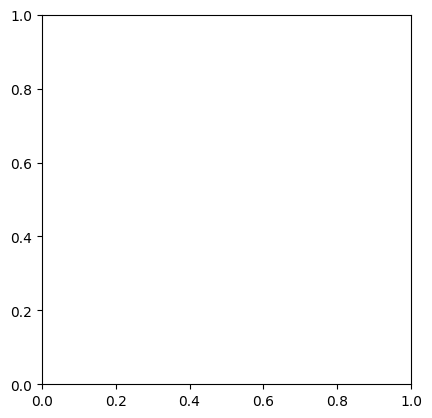

In [61]:
plt.imshow(test_images.squeeze(0), cmap='gray')

In [ ]:
rand_image_tensor = torch.rads(size=())
